# Pymaceuticals Inc.
---

### Analysis

- We have been given two lists - one provides us information about the test subjects before treatment began and the other provides the study results
- Using the various functions in python, this data has been analysed and graphs have been drawn based on relevant data
- The analysis of Pymaceuticals Inc. experiment is as given below:-
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mice_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
combined_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
combined_mice_data.shape

(1893, 8)

In [32]:
# Checking the number of mice.
total_number = len(combined_mice_data["Mouse ID"].unique())
total_number

249

In [33]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_filter = combined_mice_data.loc[combined_mice_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_filter

array(['g989'], dtype=object)

In [34]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_mice_data.loc[combined_mice_data["Mouse ID"]=="g989",:]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_mice_data[~combined_mice_data.isin(duplicate_data)].dropna()
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0.0,Capomulin,Female,9.0,22.0
1,f932,0.0,45.0,0.0,Ketapril,Male,15.0,29.0
2,g107,0.0,45.0,0.0,Ketapril,Female,2.0,29.0
3,a457,0.0,45.0,0.0,Ketapril,Female,11.0,30.0
4,c819,0.0,45.0,0.0,Ketapril,Male,21.0,25.0


In [36]:
# Checking the number of mice in the clean DataFrame.
clean_total_number = len(clean_data["Mouse ID"].unique())
clean_total_number

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
std_devtn = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
data_sem = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_vol_summary = pd.DataFrame({"Tumor Volume Mean": mean,
                                 "Tumor Volume Median": median,
                                 "Tumor Volume Variance": variance,
                                 "Tumor Volume Standard Deviation": std_devtn,
                                 "Tumor Volume Standard Error": data_sem})

tumor_vol_summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
simple_summary = clean_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
simple_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [39]:
#Generating the table for number of times each drug was used
drug_use_data = clean_data["Drug Regimen"].value_counts()
drug_use_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

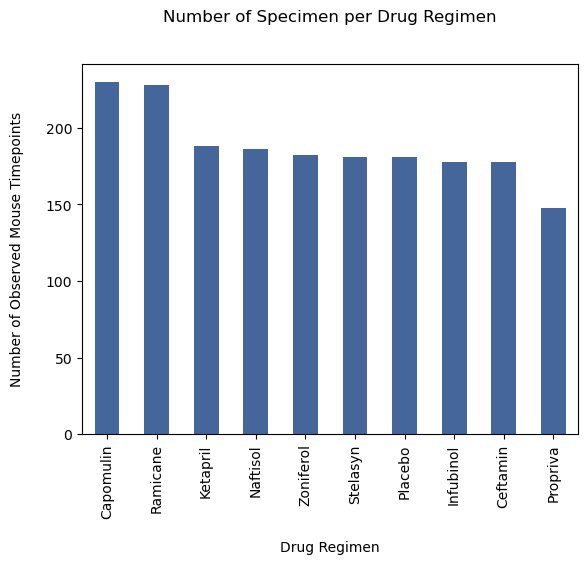

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_plot = drug_use_data.plot(kind="bar", title="Number of Specimen per Drug Regimen\n\n", color="#07337a", alpha=0.75)

plt.xlabel("\nDrug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints\n")

plt.show()

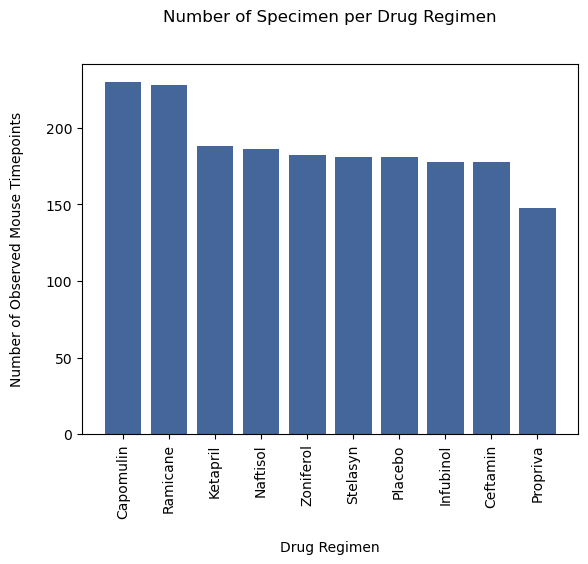

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = drug_use_data.index.values
y_axis = drug_use_data.values

pyplot_plotting = plt.bar(x_axis, y_axis, color="#07337a", alpha=0.75)

plt.title("Number of Specimen per Drug Regimen\n\n")
plt.xlabel("\nDrug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints\n")
plt.xticks(rotation="vertical")

plt.show()

In [42]:
#Generating the source table for number of male and female mice
gender_data = clean_data["Sex"].value_counts()
# number = clean_data["Sex"].values

# gender_data = pd.DataFrame({"Gender":gender,
#                            "Number of mice":number})
#gender_data['Gender'] = pd.to_numeric(gender_data['Gender'])

gender_data

Male      958
Female    922
Name: Sex, dtype: int64

In [43]:
gender_data.dtypes

dtype('int64')

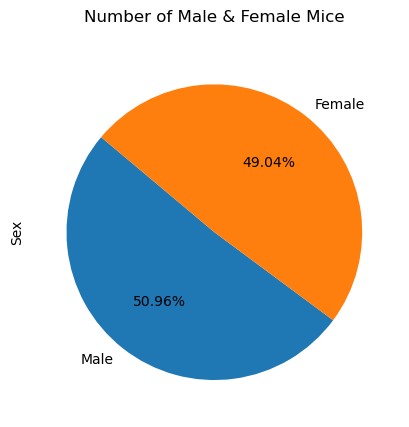

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_plot = gender_data.plot(kind="pie", title="Number of Male & Female Mice\n", autopct="%1.2f%%",
                                  startangle=140)
plt.show()

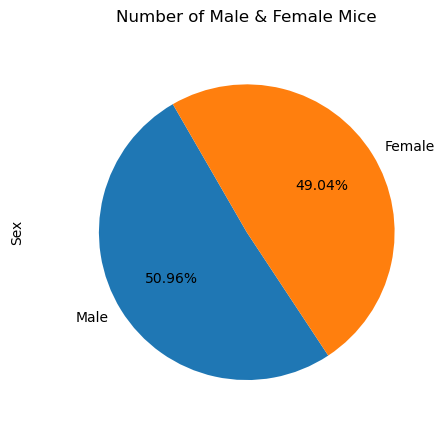

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_data.index.values
pyplot_pie_plotting = plt.pie(gender_data, labels=labels, autopct="%1.2f%%", startangle=1200)

plt.title("Number of Male & Female Mice\n")
plt.ylabel("Sex\n\n")

plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
ramicane = clean_data.loc[clean_data['Drug Regimen'] == "Ramicane"]
infubinol = clean_data.loc[clean_data['Drug Regimen'] == "Infubinol"]
ceftamin = clean_data.loc[clean_data['Drug Regimen'] == "Ceftamin"]
capomulin = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]

# Start by getting the last (greatest) timepoint for each mouse
drugs_injected = [ramicane, infubinol, ceftamin, capomulin]
drugs_used = pd.concat(drugs_injected)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time = combined_mice_data.groupby(["Mouse ID"])["Timepoint"].max()

merged_injected = pd.merge(drugs_used,max_time, on="Mouse ID")
merged_injected["MaxTime"] = merged_injected["Timepoint_x"] == merged_injected["Timepoint_y"]
merged_injected.rename(columns={"Timepoint_x":"Last Timepoint"}, inplace=True)

merged_injected.drop(merged_injected.loc[merged_injected['MaxTime']==False].index, inplace=True)

time_tumor_df = merged_injected[["Mouse ID","Drug Regimen","Last Timepoint", "Tumor Volume (mm3)"]]
time_tumor_df

,Mouse ID,Drug Regimen,Last Timepoint,Tumor Volume (mm3)
6,c458,Ramicane,30.0,38.342008
14,q610,Ramicane,35.0,36.561652
24,j913,Ramicane,45.0,31.560470
34,a411,Ramicane,45.0,38.407618
44,a444,Ramicane,45.0,43.047543
...,...,...,...,...
778,t565,Capomulin,45.0,34.455298
788,i557,Capomulin,45.0,47.685963
798,m957,Capomulin,45.0,33.329098
803,f966,Capomulin,20.0,30.485985


In [47]:
# Put treatments into a list for for loop (and later for plot labels)
drug_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_name:
    volume = time_tumor_df.loc[time_tumor_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
     
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"The outliers for {drug} are {outliers}.")

The outliers for Infubinol are 229    36.321346
Name: Tumor Volume (mm3), dtype: float64.


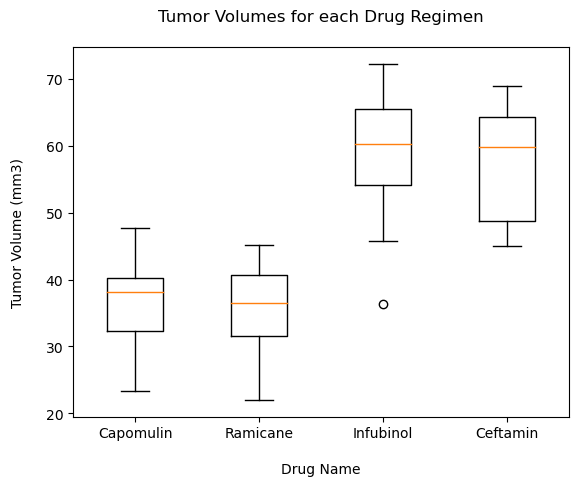

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_title("Tumor Volumes for each Drug Regimen\n")
ax1.set_ylabel('Tumor Volume (mm3)\n')
ax1.set_xlabel('\nDrug Name')
# ax1.set_xticklabels(labels=drug_name)

ax1.boxplot(tumor_volume, labels=drug_name)
plt.show()

## Line and Scatter Plots

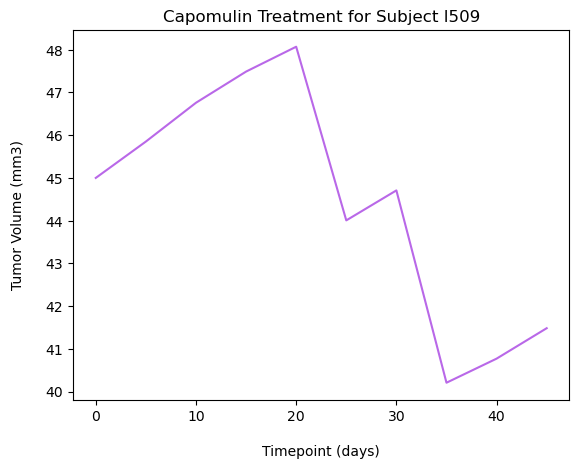

In [49]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

#Choosing our mouse option as "l509"
#Locating the mouse data for Capomulin treatment
single_mouse = capomulin.loc[capomulin["Mouse ID"]=="l509"]

#Creating the line graph
x = single_mouse["Timepoint"]
y = single_mouse["Tumor Volume (mm3)"]

plt.plot(x, y, color="#b968e8")
plt.title("Capomulin Treatment for Subject l509")
plt.xlabel("\nTimepoint (days)")
plt.ylabel("Tumor Volume (mm3)\n")

plt.show()

In [50]:
#Generating the source table for mouse weight vs. the average observed tumor volume
mouse_data = capomulin.groupby("Mouse ID")

#variables to hold column data
mouse_weight = mouse_data["Weight (g)"].mean()
mouse_tumor_vol = mouse_data["Tumor Volume (mm3)"].mean()

#create new df
mouse_df = pd.DataFrame({"Weight (g)": mouse_weight,
                       "Tumor Volume (mm3)": mouse_tumor_vol})
mouse_df

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344
i557,24.0,44.805810
i738,20.0,39.141053
j119,23.0,44.465236
j246,21.0,43.216925


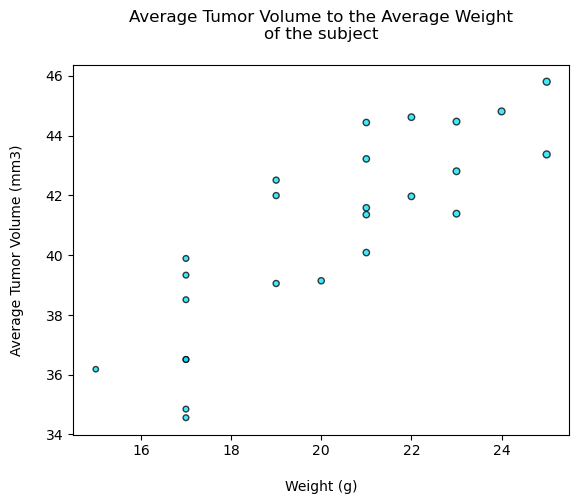

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
x_values = mouse_df["Weight (g)"]
y_values = mouse_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors="#05e1fa", edgecolors="black", s=x_values, alpha=0.75)

plt.title("Average Tumor Volume to the Average Weight\nof the subject\n")
plt.xlabel("\nWeight (g)")
plt.ylabel("Average Tumor Volume (mm3)\n")

plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.84


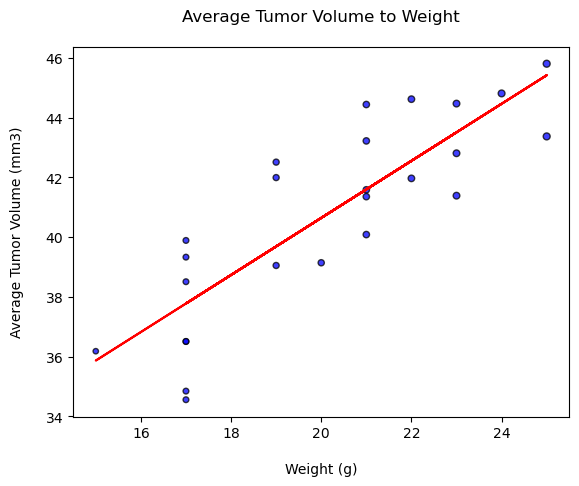

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=x_values, alpha=0.75)

plt.title("Average Tumor Volume to Weight\n")
plt.xlabel("\nWeight (g)")
plt.ylabel("Average Tumor Volume (mm3)\n")

#plot line
plt.plot(x_values,regress_values,"r-")

#print correlation coefficient
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")